# EDA and Feature Engineering 

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode

In [42]:
df = pd.read_excel('/home/ishant/Desktop/DedectChurn/Dataset/customer_churn_large_dataset.xlsx')

In [5]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [9]:
df.isna().sum()
# no null value 

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [12]:
# EDA 

Text(0.5, 1.0, 'Correlation Matrix')

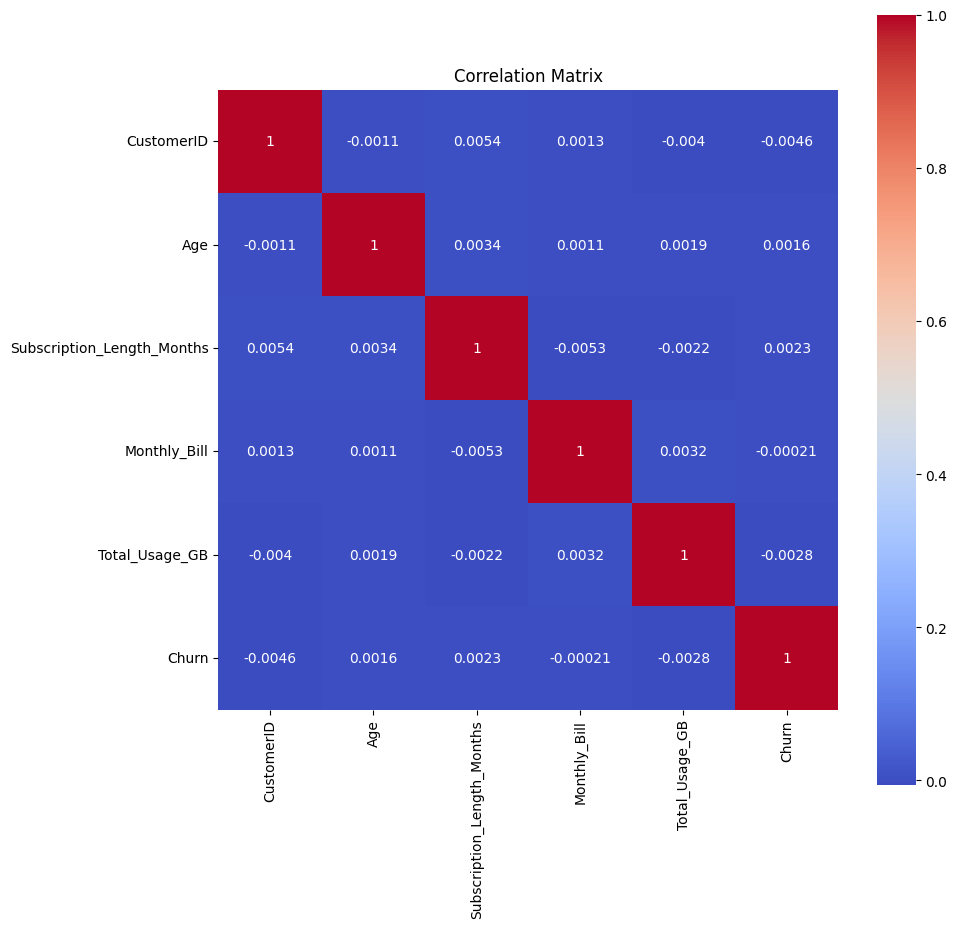

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [13]:
fig = go.Figure(data=[go.Pie(labels=['Not Churn','Churn'], values=df['Churn'].value_counts())])
fig.show()

In [15]:
fig = go.Figure(data=[go.Pie(labels=df['Location'].value_counts().index , values=df['Location'].value_counts())])
fig.show()

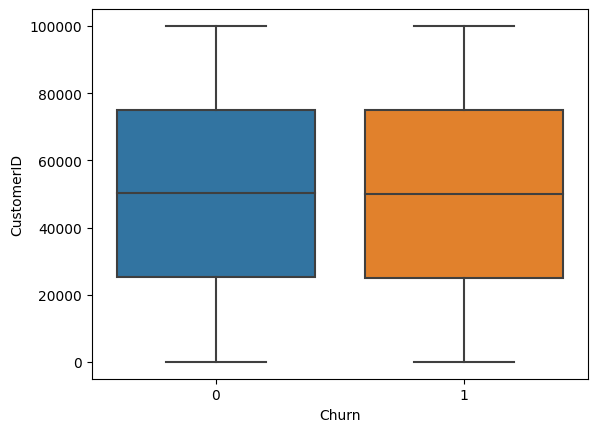

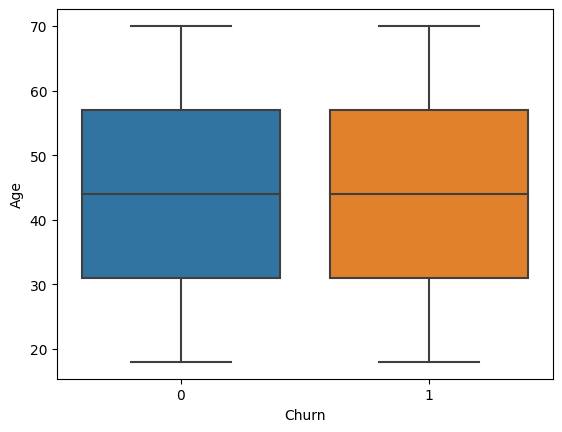

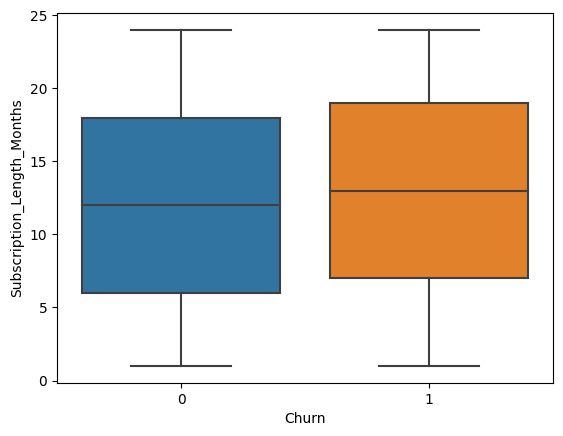

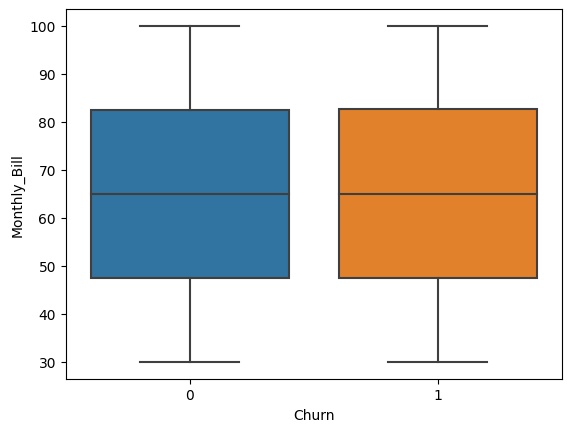

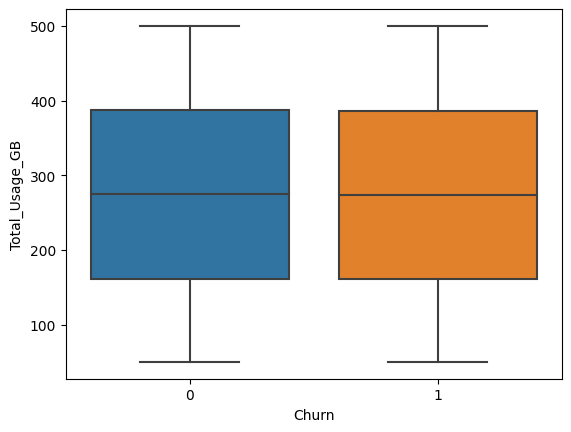

In [27]:
for i in numeric_cols:
    if i !='Churn':
        sns.boxplot(x = df.Churn, y = df[i])
        plt.show()

Text(0.5, 1.0, 'Distribution of Age by churn')

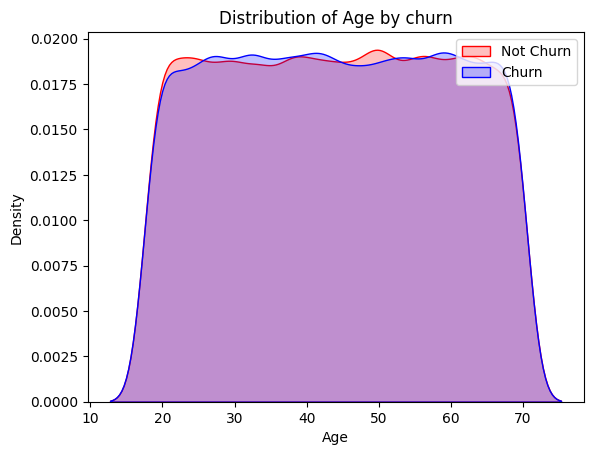

In [33]:
ax = sns.kdeplot(df.Age[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Age[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by churn')

Text(0.5, 1.0, 'Distribution of Monthly_Bill by churn')

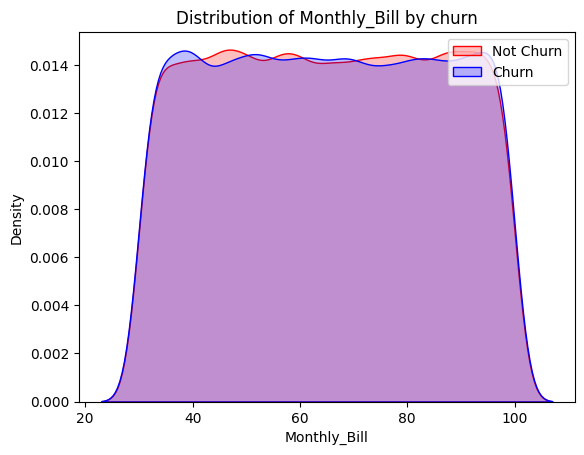

In [34]:
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly_Bill')
ax.set_title('Distribution of Monthly_Bill by churn')

Text(0.5, 1.0, 'Distribution of Total_Usage_GB by churn')

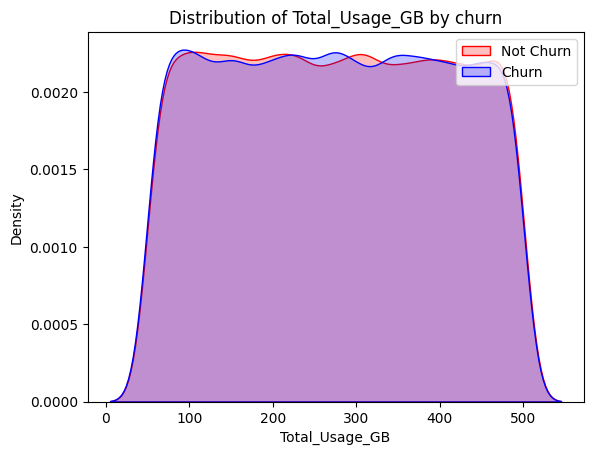

In [35]:
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 0) ],
                color="Red", fill=True)
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 1) ],
                ax =ax, color="Blue",fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total_Usage_GB')
ax.set_title('Distribution of Total_Usage_GB by churn')

# Feature Engineering 

In [44]:
df["Total_Spend"] = df.Subscription_Length_Months*df.Monthly_Bill
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66


In [62]:
Total_Spend_mean = df.groupby(['Churn'])['Total_Spend'].mean()
print(Total_Spend_mean)

Churn
0    811.074835
1    812.489733
Name: Total_Spend, dtype: float64


In [45]:
df['Data_Value'] = round(df.Total_Usage_GB/df.Monthly_Bill)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,1247.12,3.0
1,2,Customer_2,62,Female,New York,1,48.76,172,0,48.76,4.0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,427.35,5.0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,293.82,3.0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,1104.66,5.0


In [61]:
Data_val_mean = df.groupby(['Churn'])['Data_Value'].mean()
print(Data_val_mean)

Churn
0    4.718444
1    4.715824
Name: Data_Value, dtype: float64


In [46]:
df['Gender'].replace({"Male":1 , "Female":0} , inplace=True)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0,1247.12,3.0
1,2,Customer_2,62,0,New York,1,48.76,172,0,48.76,4.0
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0,427.35,5.0
3,4,Customer_4,36,0,Miami,3,97.94,297,1,293.82,3.0
4,5,Customer_5,46,0,Miami,19,58.14,266,0,1104.66,5.0


In [59]:
Gender_count = df.groupby(['Churn'])['Gender'].value_counts()
print(Gender_count)

Churn  Gender
0      0         25272
       1         24949
1      0         24944
       1         24835
Name: count, dtype: int64


In [50]:
bins = [17, 35, 55, 71]  # Define age group bins
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.drop("Age", axis=1 , inplace=True)
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Usage_Difference
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,-38.481208
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,-102.481208
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,185.710603
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,22.578737
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,-8.421263


In [57]:
Age_count = df.groupby(['Churn'])['Age_Group'].value_counts()
print(Age_count)

Churn  Age_Group  
0      Middle-aged    19003
       Young          17000
       Senior         14218
1      Middle-aged    18838
       Young          16822
       Senior         14119
Name: count, dtype: int64


In [54]:
df['Loyal_Customer'] = df['Subscription_Length_Months'].apply(lambda x: 1 if x > 20 else 0)
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Usage_Difference,Loyal_Customer
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,-38.481208,0
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,-102.481208,0
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,185.710603,0
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,22.578737,0
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,-8.421263,0


In [55]:
Loyal_count = df.groupby(['Churn'])['Loyal_Customer'].value_counts()
print(Loyal_count)

Churn  Loyal_Customer
0      0                 41912
       1                  8309
1      0                 41471
       1                  8308
Name: count, dtype: int64


In [49]:
age_usage = df.groupby('Age_Group')['Total_Usage_GB'].mean().reset_index()
age_usage.rename(columns={'Total_Usage_GB': 'Monthly_Usage_per_Age'}, inplace=True)
df = df.merge(age_usage, on='Age_Group', how='left')

# Calculate the difference between a person's usage and their age group's mean usage
df['Usage_Difference'] = df['Total_Usage_GB'] - df['Monthly_Usage_per_Age']
df.drop('Monthly_Usage_per_Age' , axis=1 , inplace=True)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Usage_Difference
0,1,Customer_1,63,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,-38.481208
1,2,Customer_2,62,0,New York,1,48.76,172,0,48.76,4.0,Senior,-102.481208
2,3,Customer_3,24,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,185.710603
3,4,Customer_4,36,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,22.578737
4,5,Customer_5,46,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,-8.421263


Text(0.5, 1.0, 'Correlation Matrix')

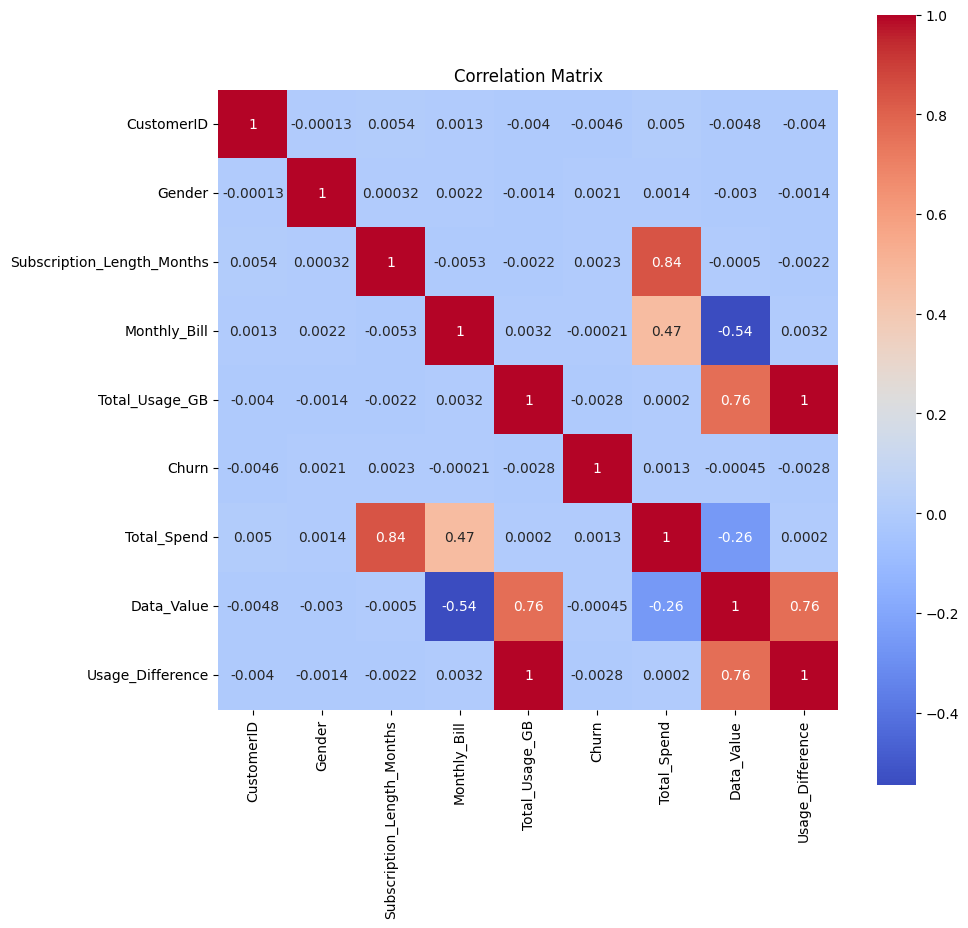

In [52]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Model Building 

In [73]:
def prepare_data(data):
    # One-hot encode the 'type' column
    data = pd.concat([data, pd.get_dummies(data[['Location' , 'Age_Group']]).astype(int)], axis=1)

    data.drop(['Location' , 'Age_Group'], axis=1, inplace=True)
    

    X = data.drop('Churn', axis=1)
    y = data['Churn']
   

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=24)

    # Standardize selected columns
    col_names = X.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    X_train[col_names] = scaler.fit_transform(X_train[col_names])
    X_test[col_names] = scaler.transform(X_test[col_names])
    

    return X_train, X_test, y_train, y_test

In [74]:
df.head()

,CustomerID,Name,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Usage_Difference,Loyal_Customer
0,1,Customer_1,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,-38.481208,0
1,2,Customer_2,0,New York,1,48.76,172,0,48.76,4.0,Senior,-102.481208,0
2,3,Customer_3,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,185.710603,0
3,4,Customer_4,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,22.578737,0
4,5,Customer_5,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,-8.421263,0


In [75]:
df2 = df.drop(['CustomerID',	'Name' ] , axis=1)
df2.head()

,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Spend,Data_Value,Age_Group,Usage_Difference,Loyal_Customer
0,1,Los Angeles,17,73.36,236,0,1247.12,3.0,Senior,-38.481208,0
1,0,New York,1,48.76,172,0,48.76,4.0,Senior,-102.481208,0
2,0,Los Angeles,5,85.47,460,0,427.35,5.0,Young,185.710603,0
3,0,Miami,3,97.94,297,1,293.82,3.0,Middle-aged,22.578737,0
4,0,Miami,19,58.14,266,0,1104.66,5.0,Middle-aged,-8.421263,0


In [76]:
X_train, X_test, y_train, y_test = prepare_data(df2)

In [77]:
custom_names = {
    LogisticRegression(solver='liblinear', random_state=24): 'Custom Logistic Regression',
    DecisionTreeClassifier(random_state=24): 'Custom Decision Tree',
    KNeighborsClassifier(n_neighbors=5): 'Custom KNN',
    RandomForestClassifier(random_state=24): 'Custom Random Forest'
}


cv_models = list(custom_names.keys())

# Iterate through the models and print their test accuracy
for model in cv_models:
    model_name = custom_names[model]
    print("{} Test Accuracy: {}".format(model_name, cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()))

Custom Logistic Regression Test Accuracy: 0.5031285714285715
Custom Decision Tree Test Accuracy: 0.5030428571428571
Custom KNN Test Accuracy: nan


/home/ishant/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:842: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ishant/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/home/ishant/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/ishant/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/home/ishant/.local/lib/python3.8/site-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "/home/ishant/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKmin

Custom Random Forest Test Accuracy: 0.5014142857142858


In [71]:
X_train.isna().sum()

Gender                        0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Total_Spend                   0
Data_Value                    0
Usage_Difference              0
Loyal_Customer                0
Location_Chicago              0
Location_Houston              0
Location_Los Angeles          0
Location_Miami                0
Location_New York             0
Age_Group_Young               0
Age_Group_Middle-aged         0
Age_Group_Senior              0
dtype: int64

In [72]:
X_test.isna().sum()

Gender                        0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Total_Spend                   0
Data_Value                    0
Usage_Difference              0
Loyal_Customer                0
Location_Chicago              0
Location_Houston              0
Location_Los Angeles          0
Location_Miami                0
Location_New York             0
Age_Group_Young               0
Age_Group_Middle-aged         0
Age_Group_Senior              0
dtype: int64

In [78]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
y_pred= knn_classifier.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [80]:
X_test.

(30000, 16)

In [81]:
X_train.shape

(70000, 16)

In [82]:
X_test.head()

,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Total_Spend,Data_Value,Usage_Difference,Loyal_Customer,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Group_Young,Age_Group_Middle-aged,Age_Group_Senior
91549,1.002489,-0.792580,0.361005,1.366379,-0.571992,0.434849,1.366167,-0.445564,2.001072,-0.504683,-0.497722,-0.502075,-0.495778,-0.715092,1.280048,-0.627721
11838,1.002489,-0.503647,1.269488,1.535173,0.009020,0.093090,1.535974,-0.445564,-0.499732,1.981441,-0.497722,-0.502075,-0.495778,1.398421,-0.781221,-0.627721
13689,-0.997517,0.507618,-0.555391,0.100416,0.092552,0.093090,0.101216,-0.445564,-0.499732,-0.504683,2.009153,-0.502075,-0.495778,1.398421,-0.781221,-0.627721
9901,1.002489,-1.225979,-0.502969,0.361281,-1.109692,0.434849,0.362081,-0.445564,-0.499732,-0.504683,-0.497722,1.991734,-0.495778,1.398421,-0.781221,-0.627721
95182,-0.997517,-1.225979,-1.111262,0.284556,-1.201902,0.776608,0.285356,-0.445564,-0.499732,1.981441,-0.497722,-0.502075,-0.495778,1.398421,-0.781221,-0.627721
